# ***Import Libarary***

In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from matplotlib.image import imread
import os
import datetime
import random
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.cm as cm
import keras
from tensorflow import keras
from sklearn.utils import shuffle
from keras.models import Sequential,Model
from keras.layers import MaxPool2D,MaxPooling2D,Flatten,Dense,Conv2D,AveragePooling2D,Activation,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from skimage.segmentation import mark_boundaries
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

In [178]:
classes = ['NORMAL', 'PNEUMONIA', 'COVID19']

class_dict={0:"NORMAL",
           1:"PNEUMONIA",
           2:"COVID19"}
change = {
'NORMAL' : '0',
'PNEUMONIA': '1',
'COVID19' : '2',
}

batch_size=32
epochs=20
image_w=224
image_h=224

AUTOTUNE = tf.data.experimental.AUTOTUNE

tf.random.set_seed(10)


In [179]:
#/content/drive/MyDrive/Colab Notebooks/Pneumonia diagnosis system/dataset/Data/train
train_folder = '/kaggle/input/chest-xray-covid19-pneumonia/Data/train'
x, y = [],[]

for category in os.listdir(train_folder):
    for file in os.listdir(os.path.join(train_folder,category)):
        x.append(os.path.join(train_folder,category,file))
        y.append(category)  

train = pd.DataFrame({
    'paths_train':x,
    'class_train':y })
train.head()

paths_train class_train
0  /kaggle/input/chest-xray-covid19-pneumonia/Dat...   PNEUMONIA
1  /kaggle/input/chest-xray-covid19-pneumonia/Dat...   PNEUMONIA
2  /kaggle/input/chest-xray-covid19-pneumonia/Dat...   PNEUMONIA
3  /kaggle/input/chest-xray-covid19-pneumonia/Dat...   PNEUMONIA
4  /kaggle/input/chest-xray-covid19-pneumonia/Dat...   PNEUMONIA

In [180]:
train = shuffle(train, random_state=42)
train.reset_index(drop=True, inplace=True)
train.head()

paths_train class_train
0  /kaggle/input/chest-xray-covid19-pneumonia/Dat...     COVID19
1  /kaggle/input/chest-xray-covid19-pneumonia/Dat...   PNEUMONIA
2  /kaggle/input/chest-xray-covid19-pneumonia/Dat...   PNEUMONIA
3  /kaggle/input/chest-xray-covid19-pneumonia/Dat...      NORMAL
4  /kaggle/input/chest-xray-covid19-pneumonia/Dat...   PNEUMONIA

In [181]:
train['class_train'] = train['class_train'].map(change)
train

paths_train class_train
0     /kaggle/input/chest-xray-covid19-pneumonia/Dat...           2
1     /kaggle/input/chest-xray-covid19-pneumonia/Dat...           1
2     /kaggle/input/chest-xray-covid19-pneumonia/Dat...           1
3     /kaggle/input/chest-xray-covid19-pneumonia/Dat...           0
4     /kaggle/input/chest-xray-covid19-pneumonia/Dat...           1
...                                                 ...         ...
5139  /kaggle/input/chest-xray-covid19-pneumonia/Dat...           0
5140  /kaggle/input/chest-xray-covid19-pneumonia/Dat...           1
5141  /kaggle/input/chest-xray-covid19-pneumonia/Dat...           1
5142  /kaggle/input/chest-xray-covid19-pneumonia/Dat...           0
5143  /kaggle/input/chest-xray-covid19-pneumonia/Dat...           1

[5144 rows x 2 columns]

In [182]:
test_folder = '/kaggle/input/chest-xray-covid19-pneumonia/Data/test'
x2, y2 = [],[]

for category in os.listdir(test_folder):
    for file in os.listdir(os.path.join(test_folder,category)):
        x2.append(os.path.join(test_folder,category,file))
        y2.append(category)  

test = pd.DataFrame({
    'paths_test':x2,
    'class_test':y2 })
test.head()

paths_test class_test
0  /kaggle/input/chest-xray-covid19-pneumonia/Dat...  PNEUMONIA
1  /kaggle/input/chest-xray-covid19-pneumonia/Dat...  PNEUMONIA
2  /kaggle/input/chest-xray-covid19-pneumonia/Dat...  PNEUMONIA
3  /kaggle/input/chest-xray-covid19-pneumonia/Dat...  PNEUMONIA
4  /kaggle/input/chest-xray-covid19-pneumonia/Dat...  PNEUMONIA

In [183]:
test = shuffle(test, random_state=42)
test.reset_index(drop=True, inplace=True)
test.head()

paths_test class_test
0  /kaggle/input/chest-xray-covid19-pneumonia/Dat...     NORMAL
1  /kaggle/input/chest-xray-covid19-pneumonia/Dat...    COVID19
2  /kaggle/input/chest-xray-covid19-pneumonia/Dat...  PNEUMONIA
3  /kaggle/input/chest-xray-covid19-pneumonia/Dat...  PNEUMONIA
4  /kaggle/input/chest-xray-covid19-pneumonia/Dat...  PNEUMONIA

In [184]:
test['class_test'] = test['class_test'].map(change)
test

paths_test class_test
0     /kaggle/input/chest-xray-covid19-pneumonia/Dat...          0
1     /kaggle/input/chest-xray-covid19-pneumonia/Dat...          2
2     /kaggle/input/chest-xray-covid19-pneumonia/Dat...          1
3     /kaggle/input/chest-xray-covid19-pneumonia/Dat...          1
4     /kaggle/input/chest-xray-covid19-pneumonia/Dat...          1
...                                                 ...        ...
1283  /kaggle/input/chest-xray-covid19-pneumonia/Dat...          0
1284  /kaggle/input/chest-xray-covid19-pneumonia/Dat...          0
1285  /kaggle/input/chest-xray-covid19-pneumonia/Dat...          0
1286  /kaggle/input/chest-xray-covid19-pneumonia/Dat...          0
1287  /kaggle/input/chest-xray-covid19-pneumonia/Dat...          0

[1288 rows x 2 columns]

In [185]:
indexes=[]

def func(x):
    if x[-4:] != '.jpg':
        idx = train[train['paths_train'] == x].index
        indexes.append(idx[0])
        print(idx[0], x)
    return x

train['paths_train'].map(func)

print(train.shape)
train.drop(index=indexes, axis=0, inplace=True)
train.reset_index(drop=True, inplace=True)
print(train.shape)

(5144, 2)
(5144, 2)


In [186]:
indexes=[]

def func(x):
    if x[-4:] != '.jpg':
        idx = test[test['paths_test'] == x].index
        indexes.append(idx[0])
        print(idx[0], x)
    return x

test['paths_test'].map(func)

print(test.shape)
test.drop(index=indexes, axis=0, inplace=True)
test.reset_index(drop=True, inplace=True)
print(test.shape)

(1288, 2)
(1288, 2)


In [187]:
for el in range(100, 120):
    path = train.loc[el, 'paths_train']
    img  = cv2.imread(path)
    print(img.shape)

(720, 976, 3)
(1136, 1483, 3)
(880, 1240, 3)
(984, 1216, 3)
(760, 1136, 3)
(768, 1320, 3)
(984, 1328, 3)
(1106, 1555, 3)
(1032, 1613, 3)
(824, 1232, 3)
(1109, 1419, 3)
(976, 1312, 3)
(592, 856, 3)
(1496, 1841, 3)
(616, 992, 3)
(1341, 1798, 3)
(600, 1240, 3)
(672, 1176, 3)
(1299, 1972, 3)
(608, 1072, 3)


In [188]:
for el in range(100, 120):
    path = test.loc[el, 'paths_test']
    img  = cv2.imread(path)
    print(img.shape)

(752, 1152, 3)
(762, 1306, 3)
(864, 1184, 3)
(1178, 1700, 3)
(656, 1242, 3)
(464, 864, 3)
(1603, 1939, 3)
(1171, 1429, 3)
(1320, 1656, 3)
(808, 1064, 3)
(440, 929, 3)
(1152, 1216, 3)
(1304, 1537, 3)
(2000, 2000, 3)
(768, 1192, 3)
(1523, 1746, 3)
(1105, 1326, 3)
(1176, 1472, 3)
(584, 904, 3)
(656, 918, 3)


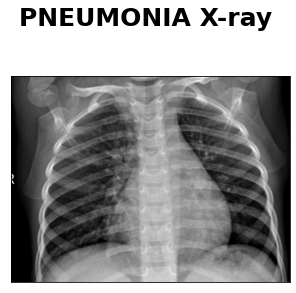

In [189]:
pneumonia_sample = imread("../input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA/PNEUMONIA(100).jpg")
plt.figure(figsize=(5,5))
plt.imshow(pneumonia_sample)
plt.suptitle('PNEUMONIA X-ray', fontsize=25, weight='bold');
plt.xticks([])
plt.yticks([])
plt.show()

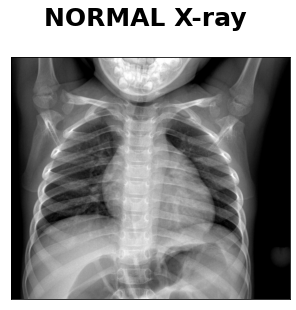

In [190]:
NORMAL_sample = imread("../input/chest-xray-covid19-pneumonia/Data/train/NORMAL/NORMAL(100).jpg")
plt.figure(figsize=(5,5))
plt.imshow(NORMAL_sample)
plt.suptitle('NORMAL X-ray', fontsize=25, weight='bold');
plt.xticks([])
plt.yticks([])
plt.show()

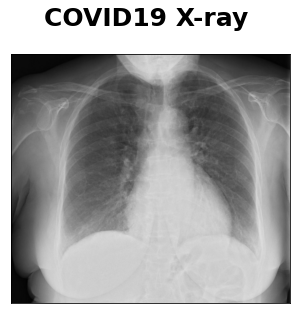

In [191]:
covid_sample = imread("../input/chest-xray-covid19-pneumonia/Data/train/COVID19/COVID19(100).jpg")
plt.figure(figsize=(5,5))
plt.imshow(covid_sample)
plt.suptitle('COVID19 X-ray', fontsize=25, weight='bold');
plt.xticks([])
plt.yticks([])
plt.show()

In [192]:
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
pretrained_densenet = ResNet152V2(input_shape=(image_w, image_h, 3), weights='imagenet', include_top=False)

for layer in pretrained_densenet.layers:
    layer.trainable = False

x = pretrained_densenet.output
x = AveragePooling2D(name="averagepooling2d")(x)
x = Flatten(name="flatten")(x)
x = Dense(512, activation="relu", name="dense_0")(x)
x = Dropout(0.15, name="dropout_0")(x)
model_out = tf.keras.layers.Dense(3, activation='softmax', name="output")(x)

model = Model(inputs=pretrained_densenet.input, outputs=model_out)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [193]:
keras.utils.plot_model(model,show_shapes=True)

In [194]:
early_stopping = EarlyStopping(monitor="val_loss", patience=6, mode="min")

checkpoint = ModelCheckpoint("loss-{val_loss:0.4f}.h5", monitor="val_loss", verbose=1, 
                             save_best_only=True, save_weights_only=True, mode="min")

learning_rate_reduction = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3, 
                                            min_lr=1e-7, verbose=1, mode="min")

In [195]:
datagen = ImageDataGenerator(rescale = 1./255,
                             zoom_range=0.1, # 0.05
                             brightness_range=[0.9, 1.0],
                             height_shift_range=0.05, 
                             width_shift_range=0.05,
                             rotation_range=10, 
                            )


test_datagen = ImageDataGenerator(rescale = 1./255)
test_data = test_datagen.flow_from_dataframe(test,
                                        x_col="paths_test",
                                        y_col="class_test",
                                        target_size=(image_w,image_h),
                                        color_mode='rgb',
                                        batch_size=batch_size,
                                        class_mode='categorical',
                                        shuffle=False,
                                        num_parallel_calls=AUTOTUNE)

Found 1288 validated image filenames belonging to 3 classes.


In [196]:
init_time = datetime.datetime.now()
from sklearn.model_selection import StratifiedKFold
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
for train_idx , val_idx in list(kfold.split(train['paths_train'],train['class_train'])):
    train_df=train.iloc[train_idx]
    val_df=train.iloc[val_idx]


    train_data = datagen.flow_from_dataframe(train_df,
                                            x_col="paths_train",
                                            y_col="class_train",
                                            target_size=(image_w,image_h),
                                            color_mode='rgb',
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            shuffle=True,
                                            num_parallel_calls=AUTOTUNE)


    val_data = test_datagen.flow_from_dataframe(val_df,
                                            x_col="paths_train",
                                            y_col="class_train",
                                            target_size=(image_w,image_h),
                                            color_mode='rgb',
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            shuffle=False,
                                            num_parallel_calls=AUTOTUNE)

    train_steps = train_data.samples//batch_size
    valid_steps = val_data.samples//batch_size



    history = model.fit(
        train_data,
        validation_data=val_data,
        batch_size=batch_size,
        epochs=epochs,
        steps_per_epoch=train_steps,
        validation_steps=valid_steps,
        callbacks=[
                    checkpoint, 
                    early_stopping, 
                    learning_rate_reduction],
        verbose=1,
        )
requared_time = datetime.datetime.now() - init_time
print(f'\nRequired time:  {str(requared_time)}\n')





Found 4629 validated image filenames belonging to 3 classes.
Found 515 validated image filenames belonging to 3 classes.


2023-02-04 11:42:45.665152: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2023-02-04 11:42:56.459488: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


144/144 [==============================] - 246s 2s/step - loss: 1.0418 - accuracy: 0.8993 - val_loss: 0.2104 - val_accuracy: 0.9316

Epoch 00001: val_loss improved from inf to 0.21041, saving model to loss-0.2104.h5
Epoch 2/20
144/144 [==============================] - 186s 1s/step - loss: 0.1601 - accuracy: 0.9419 - val_loss: 0.2351 - val_accuracy: 0.9199

Epoch 00002: val_loss did not improve from 0.21041
Epoch 3/20
144/144 [==============================] - 181s 1s/step - loss: 0.1385 - accuracy: 0.9532 - val_loss: 0.2841 - val_accuracy: 0.9141

Epoch 00003: val_loss did not improve from 0.21041
Epoch 4/20
144/144 [==============================] - 181s 1s/step - loss: 0.1207 - accuracy: 0.9554 - val_loss: 0.1743 - val_accuracy: 0.9375

Epoch 00004: val_loss improved from 0.21041 to 0.17427, saving model to loss-0.1743.h5
Epoch 5/20
144/144 [==============================] - 181s 1s/step - loss: 0.1186 - accuracy: 0.9580 - val_loss: 0.1575 - val_accuracy: 0.9551

Epoch 00005: val_lo

In [197]:
history_df = pd.DataFrame(history.history)
min_loss=history_df['val_loss'].min()
print("Minimum Validation Loss: {:0.4f}".format(min_loss));

Minimum Validation Loss: 0.0438


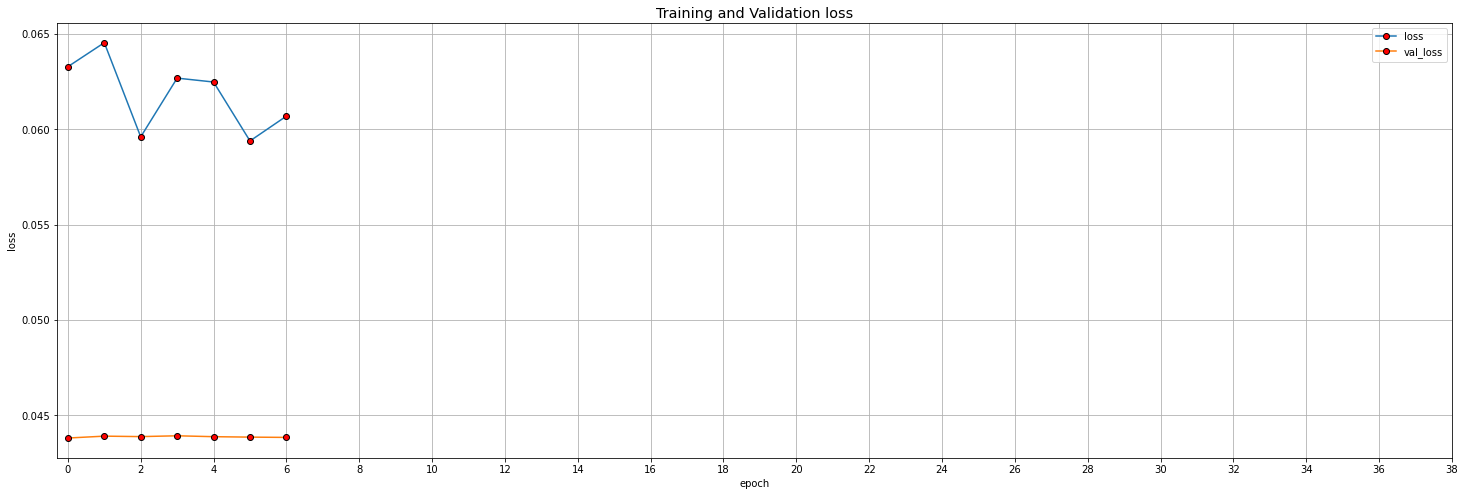

In [198]:
pd.DataFrame(history.history)[["loss", "val_loss"]].plot(figsize =(25,8), marker = "o", mfc = "r")
plt.style.use('classic')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.grid(axis='both')
plt.xticks(np.arange(0, 40, 2))
plt.show()

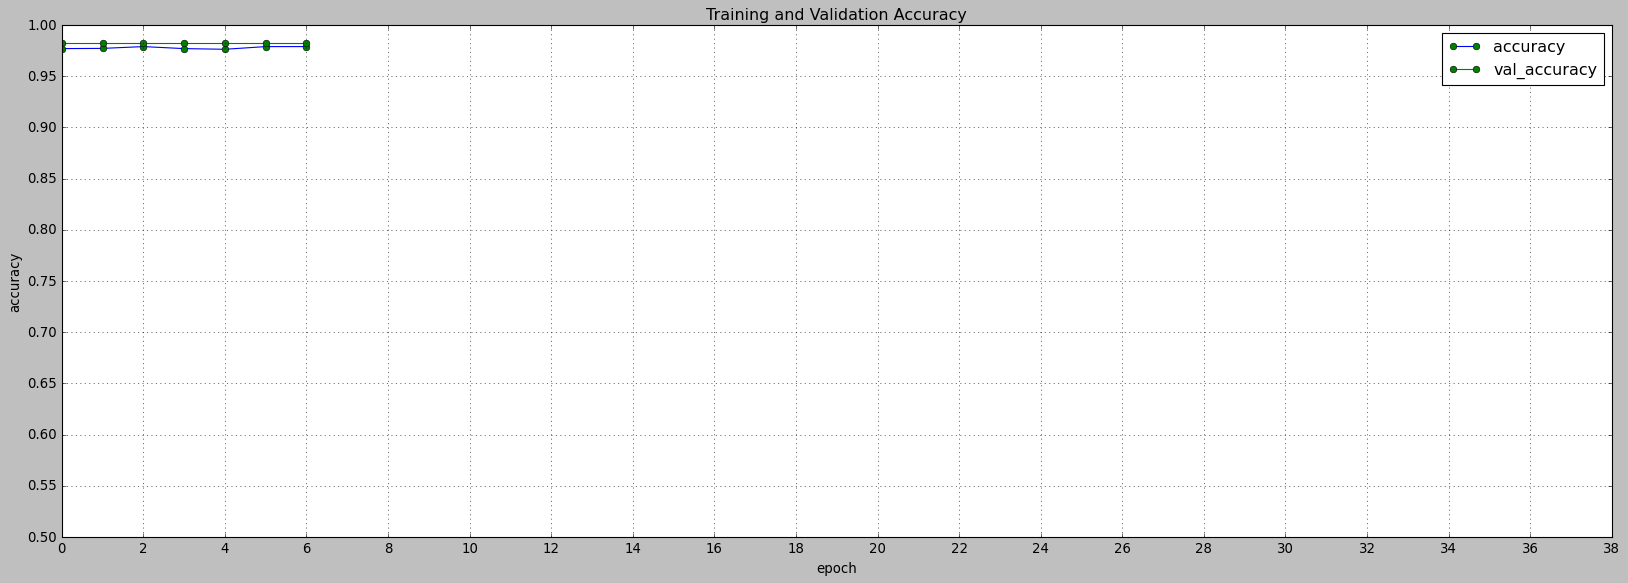

In [199]:
pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot(figsize =(25,8), marker = "o", mfc = "g")

plt.style.use('classic')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(axis='both')
plt.xticks(np.arange(0, 40, 2))
plt.yticks(np.arange(0.5, 1.01, 0.05))
plt.show()

In [200]:
#model.load_weights('loss-{:0.4f}.h5'.format(min_loss))

test_steps = test_data.samples // batch_size

test_loss, test_acc = model.evaluate(test_data,steps=test_steps)


40/40 [==============================] - 42s 1s/step - loss: 0.1426 - accuracy: 0.9578


In [201]:
print('\naccuracy: {}%'.format(round(test_acc*100,2)), '\nloss: {:0.4f}'.format(test_loss))


accuracy: 95.78% 
loss: 0.1426


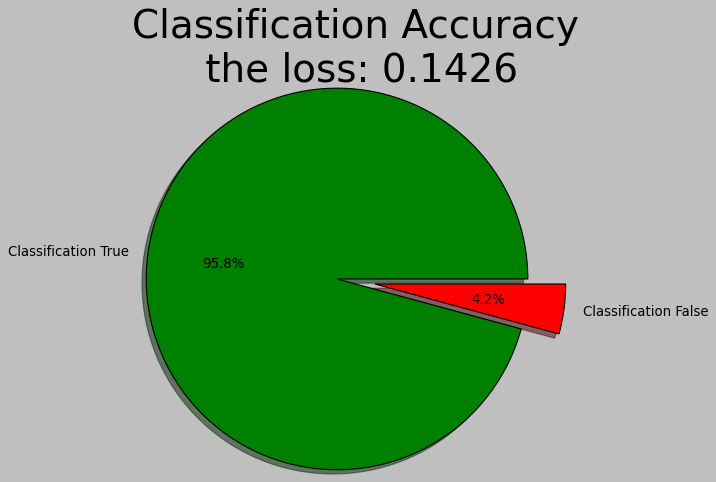

In [202]:
plt.style.use('classic')
plt.pie([test_acc,1-test_acc],labels=('Classification True','Classification False')
        ,explode=[0.1,0.1],autopct="%1.1f%%",shadow=True,colors=['green','red'])
plt.axis('equal')
plt.title('Classification Accuracy\n the loss: {:0.4f}'.format(test_loss),fontsize=35)
plt.show()

In [203]:
model.save('CNN1.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


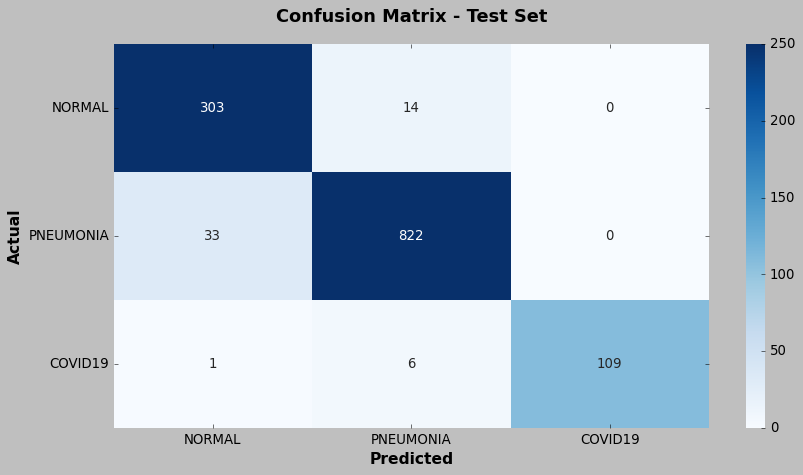

In [204]:
y_pred=model.predict(test_data)
predictions=np.array(list(map(lambda x:np.argmax(x),y_pred)))
y_true=test_data.classes
CMatrix=pd.DataFrame(confusion_matrix(y_true,predictions),columns=classes,index=classes)
plt.figure(figsize=(12, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);
ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);

In [205]:
print(y_true[:10])
print(predictions[:10])

[0, 2, 1, 1, 1, 1, 1, 0, 1, 1]
[0 2 1 1 1 1 1 0 1 1]


In [206]:
print(classification_report(y_true, predictions))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       317
           1       0.98      0.96      0.97       855
           2       1.00      0.94      0.97       116

    accuracy                           0.96      1288
   macro avg       0.96      0.95      0.95      1288
weighted avg       0.96      0.96      0.96      1288



In [207]:
def find_true_class(file_path):
    true_class = None
    if 'COVID19' in file_path:
        true_class = 'COVID19'
    elif 'PNEUMONIA' in file_path:
        true_class = 'PNEUMONIA'
    elif 'NORMAL' in file_path:
        true_class = 'NORMAL'
    return true_class

In [208]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap, top_pred_index.numpy()


In [209]:
# https://keras.io/examples/vision/grad_cam/
def superimposed_img(img, heatmap,pred_class,pred_prob_final):

  # We rescale heatmap to a range 0-255
  heatmap = np.uint8(255 * heatmap)

  # We use jet colormap to colorize heatmap
  jet = cm.get_cmap("jet")

  # We use RGB values of the colormap
  jet_colors = jet(np.arange(256))[:, :3]
  jet_heatmap = jet_colors[heatmap]

  # We create an image with RGB colorized heatmap
  jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
  jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
  jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

  # Superimpose the heatmap on original image
  superimposed_img = jet_heatmap * 0.4 + img
  superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

  # Display Grad CAM

  plt.matshow(superimposed_img)

  plt.xticks([])
  plt.yticks([])

  plt.title('Predict: '+str(pred_class)+'\n Confidence: '+str(pred_prob_final)+"%",fontsize=25, weight='bold');

  plt.show()




In [210]:
# label smoothing https://www.linkedin.com/pulse/label-smoothing-solving-overfitting-overconfidence-code-sobh-phd/
def categorical_smooth_loss(y_true, y_pred, label_smoothing=0.1):
    loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred, label_smoothing=label_smoothing)
    return loss

In [211]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [212]:
last_conv_layer_name = "block5_conv4"
classifier_layer_names = [
    "block5_conv4",
    'block5_pool',
    "averagepooling2d",
    "flatten",
    "dense_0",
    "dropout_0",
    "output",
]

In [213]:
def img_rgb(img_test_path):

    test_image=cv2.imread(img_test_path,cv2.IMREAD_COLOR)
    test_image=cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)
    test_image=cv2.resize(test_image,(224,224))
    
    return test_image 


def imshow(img_test_path):
    
    img_test_list=list(img_test_path.split('/'))
    test_image=img_rgb(img_test_path)
    plt.xticks([])
    plt.yticks([])
    plt.title('the Actual Class: :{}'.format(img_test_list[-2]),fontsize=25)
    plt.imshow(test_image)
    plt.show()
    

    
def show_visual_img(img_test_path):
    
    test_image=img_rgb(img_test_path)
    
    test_image=np.expand_dims(test_image,axis=0)
    
    img=img_rgb(img_test_path)
    
    img=np.expand_dims(img,axis=0)

    img=img/255.0
    
    score = model.predict(img)


    pred_class_num=np.argmax(score)
    print(pred_class_num)
    pred_class=class_dict[pred_class_num]
    print(pred_class)

    pred_prob=np.max(score) * 100
    print(pred_prob)
    pred_prob_final=round(pred_prob,2)

    heatmap, top_index = make_gradcam_heatmap(test_image, 
                                              model, 
                                              last_conv_layer_name, 
                                              classifier_layer_names)

    superimposed_img(test_image[0], heatmap,pred_class,pred_prob_final)
    
    


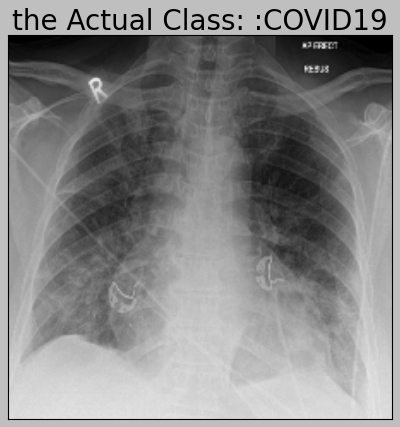

In [214]:
img_test_path='/kaggle/input/chest-xray-covid19-pneumonia/Data/test/COVID19/COVID19(520).jpg'
imshow(img_test_path)

In [215]:
show_visual_img(img_test_path)

2
COVID19
99.99998807907104


ValueError: No such layer: block5_conv4.

In [ ]:
from glob import glob

test_paths = np.array(glob('/kaggle/input/chest-xray-covid19-pneumonia/Data/test' + '/*/*.jpg'))

ids = np.random.choice(np.arange(len(test_paths)), size=32)


samples = test_paths[ids]

In [ ]:
im_test = []
c = 0
for img in samples:
    c = c + 1
    img_path = img
    img_arr = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img_arr = cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB)
    img_arr = cv2.resize(img_arr, (224, 224))
    img_arr = img_arr / 255.0
    im_test.append(img_arr)

    
im_test = np.array(im_test).reshape(-1, 224, 224,3)
im_pred = model.predict(im_test)

In [ ]:
fig , ax = plt.subplots(4, 4, figsize=(30, 25))


for i, axis in enumerate(ax.flat):
    axis.imshow(im_test[i][:, :, 0],cmap='gray')
    pred_class = im_pred[i].argmax()
    pred_prob = im_pred[i].max() * 100
    

    axis.set_title(f'Predict: {class_dict[pred_class]}\n Confidence: {pred_prob:.1f}%', fontsize=18)

In [ ]:
!pip install tf_keras_vis

In [ ]:
import tf_keras_vis 
from matplotlib import cm
tf_keras_vis.__version__

In [ ]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [ ]:
def model_modifier_function(cloned_model):
    '''modify model activation'''
    cloned_model.layers[-1].activation = tf.keras.activations.linear


def get_gradcam_plus(img,
                    score,
                    model=model,
                    model_modifier=ReplaceToLinear()):    
    gradcampls = GradcamPlusPlus(model,
                          model_modifier=model_modifier,
                          clone=True)
    heatmap = gradcampls(score, img)
    heatmap = np.uint8(cm.jet(heatmap[0])[..., :3] * 255)
    return heatmap

In [ ]:
iterator = iter(test_data)
# iterator.next()
# iterator.next()

imgs,labs = iterator.next()
real_labs = list(np.argmax(labs, axis=1))
print(real_labs)

In [ ]:
plt.rcParams['font.size'] = '20'
plt.subplots(batch_size,2,figsize=(20,160))

idx=1
for i,img in enumerate(imgs[:batch_size]):
    img_4d = tf.cast(tf.reshape(img, [-1, image_w, image_h, 3]), tf.float32)
    predict = model.predict(img_4d)
    print(predict)
    prd = np.argmax(predict)
#     print(f'class: {class_dict[prd]}')
    score1 = CategoricalScore(prd)
    original_lab = real_labs[i]
    
    plt.subplot(batch_size,2,idx)
    plt.title(f'orignal {class_dict[original_lab]}')
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.binary)
    idx+=1
    
    plt.subplot(batch_size,2,idx)
    gdcam_pls = get_gradcam_plus(img, score1)
    plt.imshow(img, cmap=plt.cm.binary)
    if prd:
        plt.imshow(gdcam_pls, alpha=0.2, cmap='jet')
    
    proba = round(float(predict[0][prd]), 4)
    plt.title(f'predicted {class_dict[prd]}  {proba} probability')
    plt.axis('off')
    idx+=1
    if idx>batch_size*2:
        break

plt.tight_layout()
plt.show()